In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv('../train.csv')
test_df = pd.read_csv('../test.csv')

print(train_df.shape,test_df.shape)

(42000, 785) (28000, 784)


##### Visualize a sample image

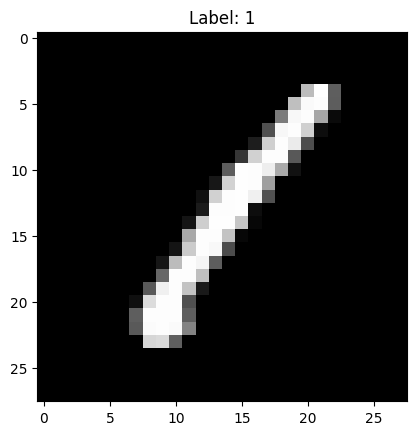

In [3]:
import matplotlib.pyplot as plt

pixels = train_df.iloc[0, 1:].values.reshape(28, 28)
plt.imshow(pixels, cmap='gray')
plt.title(f"Label: {train_df.iloc[0, 0]}")
plt.show()

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [6]:
train_df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
train_df.duplicated().sum()

np.int64(0)

##### Separate features (X) and labels (y)

In [8]:
X = train_df.drop('label', axis=1).values
y = train_df['label'].values

##### Normalize pixel values (0–255 → 0–1)

In [9]:
X = X/255.0
test_X = test_df.values/255.0

##### reshape for CNNs (samples, 28, 28, 1)

In [10]:
X_cnn = X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

##### Baseline ML Model

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train , X_val , y_train , y_val = train_test_split(X,y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100 , random_state=42)

rf.fit(X_train,y_train)

y_pred = rf.predict(X_val)
print("validation Accuracy:" , accuracy_score(y_val, y_pred))

validation Accuracy: 0.9629761904761904


##### Generate Submission with Random Forest

In [12]:
# Predict on test set
test_pred = rf.predict(test_X.reshape(-1, 28*28))  # flatten for RF

# Prepare submission dataframe
submission = pd.DataFrame({
    "ImageId": range(1, len(test_pred)+1),
    "Label": test_pred
})

# Save to CSV
submission.to_csv('../submissions/submission_rf.csv', index=False)

##### Tuning Random Forest

In [13]:
rf_tuned = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 20,
    min_samples_split= 5,
    min_samples_leaf= 2,
    random_state=42 ,
    n_jobs= -1,
    verbose=1
)

# train the model 
rf_tuned.fit(X_train,y_train)

# see validation accuracy after tuning the model
y_pred_tuned = rf_tuned.predict(X_val)
val_acc_tuned = accuracy_score(y_val,y_pred_tuned)
print(f"Validation Accuracy of Tuned Model: {val_acc_tuned:5f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s


Validation Accuracy of Tuned Model: 0.962738


[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.2s finished


##### Generate Submission for Tuned Random Forest 

In [14]:
test_pred_tuned = rf_tuned.predict(test_X.reshape(-1,28*28)) # flatten for rf model

submission_tuned = pd.DataFrame({
    "ImageId": range(1,len(test_pred_tuned)+1),
    "Label": test_pred_tuned
})

submission_tuned.to_csv('../submissions/submission_rf_tuned.csv', index=False)
print("Saved submission file: ../submissions/submission_rf_tuned.csv")

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 300 out of 300 | elapsed:    0.4s finished


Saved submission file: ../submissions/submission_rf_tuned.csv
